In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_flight=pd.read_csv('Merged_weather_flight',index_col=0)

In [3]:
df_flight

,windspeedKmph,windspeedMiles,WindGustKmph,winddirDegree,weatherCode,precipMM,visibility,pressure,cloudcover,DewPointF,...,DepDel15,CRSDepTime,CRSArrTime,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,ArrDel15,ArrDelayMinutes,Month
0,18,11,28,315,122,0.0,10,1024,100,38,...,0.0,600,700,6.0,10397,13204,700,0.0,8.0,1
1,18,11,28,315,122,0.0,10,1024,100,38,...,0.0,600,800,1.0,10397,14100,800,0.0,0.0,1
2,18,11,26,317,122,0.0,10,1024,100,38,...,0.0,700,1000,0.0,10397,14747,900,0.0,0.0,1
3,18,11,26,317,122,0.0,10,1024,100,38,...,0.0,700,900,0.0,10397,13303,900,0.0,1.0,1
4,18,11,26,317,122,0.0,10,1024,100,38,...,0.0,700,900,10.0,10397,14771,900,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804989,20,13,22,303,113,0.0,10,1014,0,58,...,1.0,2300,700,15.0,14771,12264,700,0.0,0.0,9
4804990,20,13,22,303,113,0.0,10,1014,0,58,...,0.0,2300,800,0.0,14771,12478,800,0.0,0.0,9
4804991,20,13,22,303,113,0.0,10,1014,0,58,...,0.0,2300,800,0.0,14771,12478,800,0.0,0.0,9
4804992,20,13,22,303,113,0.0,10,1014,0,58,...,0.0,2300,700,0.0,14771,14100,700,0.0,0.0,9


In [4]:
df_flight["pressure_change"]=df_flight["pressure"]-1013.25

<AxesSubplot:xlabel='pressure_change', ylabel='ArrDel15'>

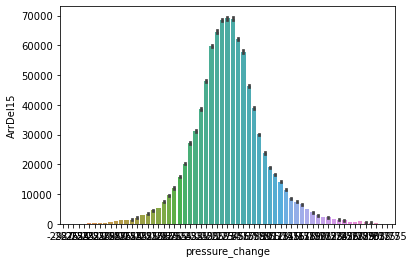

In [5]:
sns.barplot(data=df_flight,x="pressure_change",y="ArrDel15",estimator=np.sum)

In [6]:
df_flight["low_visibility"]=(df_flight["visibility"]>5).astype(int)

In [7]:
bad_weather_code=[113,116,119,122,143,176,200,266,296,353,356]

In [8]:
df_flight["badweather"]=(df_flight["weatherCode"].isin(bad_weather_code)).astype(int)

In [9]:
df_flight.drop(labels=["windspeedMiles","visibility","weatherCode","DewPointF","WindChillF","pressure"],axis=1,inplace=True)

In [10]:
df_flight

,windspeedKmph,WindGustKmph,winddirDegree,precipMM,cloudcover,tempF,humidity,time,date,airport,...,DepDelayMinutes,OriginAirportID,DestAirportID,ArrTime,ArrDel15,ArrDelayMinutes,Month,pressure_change,low_visibility,badweather
0,18,28,315,0.0,100,40,93,600,2016-01-01,ATL,...,6.0,10397,13204,700,0.0,8.0,1,10.75,1,1
1,18,28,315,0.0,100,40,93,600,2016-01-01,ATL,...,1.0,10397,14100,800,0.0,0.0,1,10.75,1,1
2,18,26,317,0.0,100,41,93,700,2016-01-01,ATL,...,0.0,10397,14747,900,0.0,0.0,1,10.75,1,1
3,18,26,317,0.0,100,41,93,700,2016-01-01,ATL,...,0.0,10397,13303,900,0.0,1.0,1,10.75,1,1
4,18,26,317,0.0,100,41,93,700,2016-01-01,ATL,...,10.0,10397,14771,900,0.0,3.0,1,10.75,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4804989,20,22,303,0.0,0,66,75,2300,2017-09-30,SFO,...,15.0,14771,12264,700,0.0,0.0,9,0.75,1,1
4804990,20,22,303,0.0,0,66,75,2300,2017-09-30,SFO,...,0.0,14771,12478,800,0.0,0.0,9,0.75,1,1
4804991,20,22,303,0.0,0,66,75,2300,2017-09-30,SFO,...,0.0,14771,12478,800,0.0,0.0,9,0.75,1,1
4804992,20,22,303,0.0,0,66,75,2300,2017-09-30,SFO,...,0.0,14771,14100,700,0.0,0.0,9,0.75,1,1


In [11]:
df_flight.columns

Index(['windspeedKmph', 'WindGustKmph', 'winddirDegree', 'precipMM',
       'cloudcover', 'tempF', 'humidity', 'time', 'date', 'airport', 'Origin',
       'Dest', 'FlightDate', 'DepTime', 'DepDel15', 'CRSDepTime', 'CRSArrTime',
       'DepDelayMinutes', 'OriginAirportID', 'DestAirportID', 'ArrTime',
       'ArrDel15', 'ArrDelayMinutes', 'Month', 'pressure_change',
       'low_visibility', 'badweather'],
      dtype='object')

In [12]:
df_flight.to_csv("Improved_dataset")